In [5]:
# Import libraries
%run ./00_libraries.ipynb
%run ./01_constants.ipynb
%run ./04_C_testcases.ipynb
# %run ./05_testcases_conditions.ipynb
# %run ./06_equations_functions.ipynb
# %run ./07_equations_matrices.ipynb

NameError: name 'p_vector' is not defined

## WELL-POSEDESS MAP

In [2]:
# superficial velocities
j_lvector = np.linspace (minj_l, maxj_l, num = testpointsj_l)
j_gvector = np.linspace (minj_g, maxj_g, num = testpointsj_g) #*****MODIFIQUE DE 1.000, 10.000 PARA 1,1

#MAP MATRICES----------------------------------------------------------------------------------------------------
j_lmapwellposedness = np.zeros ((testpointsbeta,testpointsj_l)) #(rows,columns)
var1map = np.zeros ((testpointsbeta,testpointsj_l)) #(rows,columns)

k = 0
for beta in betavector:
    print (" >>> β =", np.rad2deg (beta), "deg")
    j = 0 #for each element of j2vector
    for j_g in j_gvector: #iterative process for j2
        #print (">>j2 = ", j2)
        i = 0 #for each element of j1vector
        for j_l in j_lvector: #iterative process for j1
            #print (">j1 = ", j1)
            var4 = var4_0
            var1eq = brenth (equilibrium1, lima, limb)

            # parameters used in boundary conditions
            var1_0 = var1eq
            var2_0 = var2 (var1eq)
            var3_0 = var3 (var1eq)
           
            Aeval = np.asarray (Amat (var1_0, var2_0, var3_0, var4_0))
            Beval = np.asarray (Bmat (var1_0, var2_0, var3_0, var4_0))
            
            m1, _ = eig (Beval, b = Aeval, overwrite_a = True, overwrite_b = True, check_finite = True)
                        
            listreal1 = []
            listimag1 = []

            for l1 in range (len (m1)):
                realpart1 = m1 [l1].real                
                imagpart1 = m1 [l1].imag
                
                listimag1.append (imagpart1)
                listreal1.append (realpart1)
            
            if all ([ v == 0 for v in listimag1 ]) :
                i += 1
            else: 
                j_lmapwellposedness [k, j] = j_l
                var1map [k, j] = var1eq
                break
        j += 1
    k += 1

 >>> β = 0.0 deg
 >>> β = 0.25 deg
 >>> β = -5.0 deg


## WELL-POSEDNESS MAP: PLOT

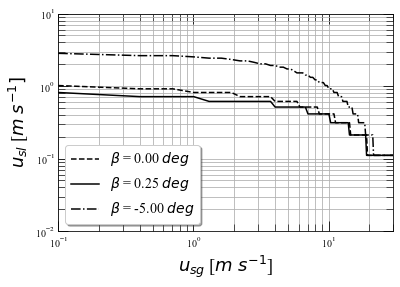

In [3]:
x = j_gvector
fig, ax = plt.subplots (1)

for i in range(testpointsbeta):
    ax.loglog (x, 
               j_lmapwellposedness [i, :], 
               liststyles [i], 
               color = listcolor [0],
               label =  r'$\beta$' + ' = ' + str ("%.2f" %betavectordeg [i]) + ' $\it{deg}$')

    #ax.scatter (mapreal [number], mapimag [number], s = area, marker = listmarkers[number], color='k', alpha = 0.5, label = '$j_1$' + '=' +str("%.2f" %j1vector [number]) + ' m/s')

    # Savitzky-Golay Filter
    #for numero in arange: #scipy.signal.savgol_filter: window size 51, polynomial order 3
    #    ax.loglog (x, scipy.signal.savgol_filter(j1map [numero,:], 91, 3), label = '$beta$' + '='+str("%.2f" %betavectordeg [numero]) + ' deg')

    #plt.title('Well-posedness limit for horizontal and inclined pipes')

#     style.use('ggplot')
    
    plt.ylim ((minj_l, maxj_l))
    plt.xlim ((minj_g, maxj_g))

    #tick_params(labeltop=False, labelright=True)
    plt.grid (True, which = "both")

    plt.rcParams ['figure.figsize'] = mapsize
    leg = ax.legend (loc = 'best', fontsize = 14, shadow = True, frameon = True,);

    matplotlib.rc ('xtick', labelsize = 18)     
    matplotlib.rc ('ytick', labelsize = 18)
    
    ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

    ax.set_xlabel(r'$u_{sg}$ [$\it{m \; s^{-1}}$]',
                  fontsize = 18)
    ax.set_ylabel(r'$u_{sl}$ [$\it{m \; s^{-1}}]$',
                  fontsize = 18)

    plt.savefig('figures/fig1.pdf',
                optimize = True,
                transparent = True,  
                dpi = 1000)

plt.show ()

## CONSTANT VOID FRACTION LINES (alpha_l = 0.5) for downflow and horizontal

In [4]:
j_gvectorline = np.linspace (minj_g, maxj_g, num = testpointsj_g)
j_llinemap = np.zeros ((testpointsbeta,testpointsj_l))

k = 0
for beta in betavector:
    print (" >>> β = ", np.rad2deg(beta), "deg")
    j = 0 #for each element of j2vector
    for j_g in j_gvectorline: #iterative process for j2        
        var1 = 0.5
        j_lline = fsolve (equilibrium2, x0) #Python function    
        j_llinemap [k, j] = j_lline
        j += 1
    k += 1

 >>> β =  0.0 deg
 >>> β =  0.25 deg
 >>> β =  -5.0 deg


## CONSTANT VOID FRACTION LINES (alphal = 0.5)

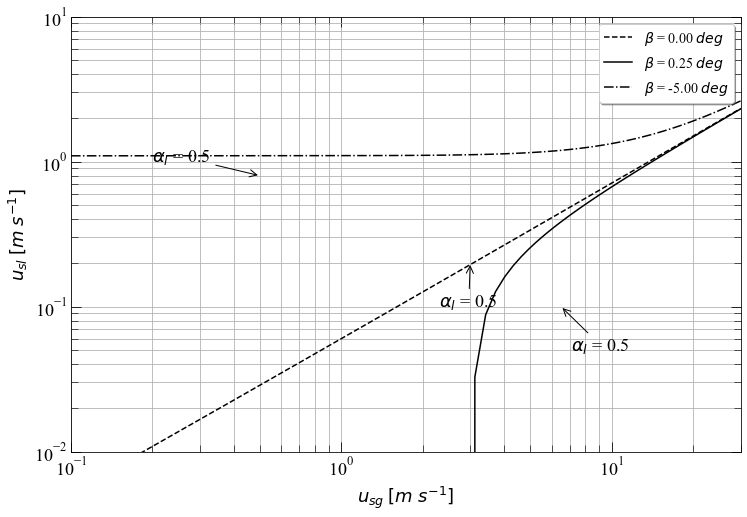

In [5]:
x = j_gvectorline
fig, ax = plt.subplots (1)

for i in range(testpointsbeta):
    ax.loglog (x,
               j_llinemap [i, :],
               liststyles [i],
               color = listcolor [0],
               label =  r'$\beta$' + ' = ' + str("%.2f" %betavectordeg [i]) + ' $\it{deg}$')

    #ax.scatter (mapreal [number], mapimag [number], s = area, marker = listmarkers[number], color='k', alpha = 0.5, label = '$j_1$' + '=' +str("%.2f" %j1vector [number]) + ' m/s')
        
# Savitzky-Golay Filter
#for numero in arange: #scipy.signal.savgol_filter: window size 51, polynomial order 3
#    ax.loglog (x, scipy.signal.savgol_filter(j1map [numero,:], 91, 3), label = '$beta$' + '='+str("%.2f" %betavectordeg [numero]) + ' deg')

#plt.title('Well-posedness limit for horizontal and inclined pipes')

plt.ylim ((minj_l, maxj_l))
plt.xlim ((minj_g, maxj_g))

#tick_params(labeltop=False, labelright=True)
plt.grid (True, which = "both")

plt.rcParams ['figure.figsize'] = [12, 8]
leg = ax.legend (loc = 'best', fontsize = 14, shadow = True, frameon = True);

matplotlib.rc ('xtick', labelsize = 18)     
matplotlib.rc ('ytick', labelsize = 18)

# Annotation for alpha_l
ax.annotate(r'$\alpha_l$ = 0.5 ', 
            xy=(0.5, 0.8), xycoords='data', size=18,
            xytext=(0.2, 1.0), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
ax.annotate(r'$\alpha_l$ = 0.5 ', 
            xy=(3, 0.2), xycoords='data', size=18,
            xytext=(2.3, 0.1), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
ax.annotate(r'$\alpha_l$ = 0.5 ', 
            xy=(6.5, 0.1), xycoords='data', size=18,
            xytext=(7.1, 0.05), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
# plt.text(0.3, 0.6, r'$\alpha_l$ = 0.5', fontsize = 18)
# plt.text(2.3, 0.1, r'$\alpha_l$ = 0.5', fontsize = 18)
# plt.text(7.1, 0.05, r'$\alpha_l$ = 0.5', fontsize = 18)

ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

ax.set_xlabel(r'$u_{sg}$ $[\it{m \; s^{-1}}]$',
            fontsize = 18)
ax.set_ylabel(r'$u_{sl}$ $[\it{m \; s^{-1}}]$',
            fontsize = 18)

plt.show ()

# plt.savefig('figures/fig2.pdf',
                # optimize = True,
                # transparent = True,  
                # dpi = 1000)

## WELL-POSEDNESS MAP: PLOT with constant alpha lines

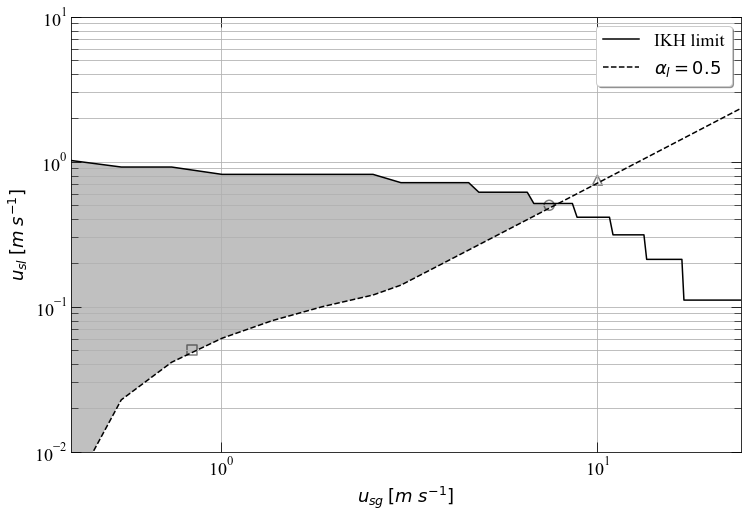

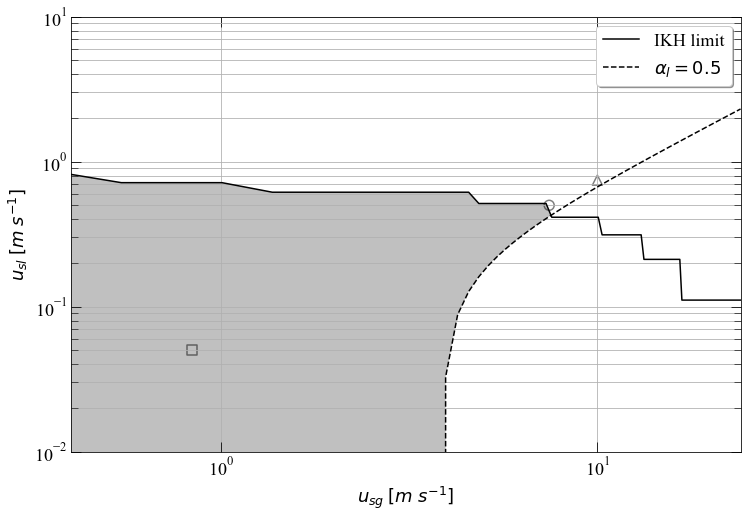

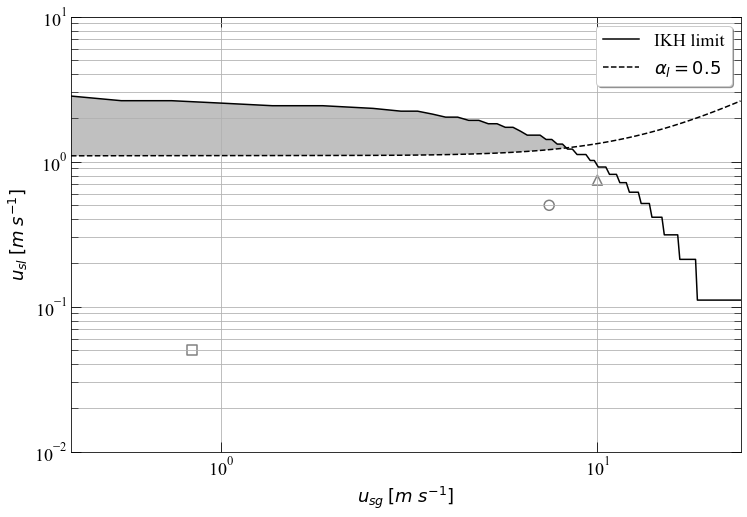

In [6]:
x = j_gvector

for i in range(testpointsbeta):
#     print("i = ", i)
    fig, ax   = plt.subplots () ###try (3)
    ax.loglog (x, 
               j_lmapwellposedness [i, :],
               liststyles [1], 
               color = listcolor [0],
               label =  'IKH limit')
    ax.loglog (x,
               j_llinemap [i, :],
               liststyles [0], 
               color = listcolor [0],
               label =  r'$\alpha_l = 0.5$ ')
    
    # Fill
    ax.fill_between(x,
                    j_llinemap [i, :],
                    j_lmapwellposedness [i, :],
                    where = j_lmapwellposedness [i, :] >= j_llinemap [i, :],
                    facecolor = 'silver',
                    interpolate = True)    #ax.scatter (mapreal [number], mapimag [number], s = area, marker = listmarkers[number], color='k', alpha = 0.5, label = '$j_1$' + '=' +str("%.2f" %j1vector [number]) + ' m/s')
    
    #Scatter for test points
    # ax.plot(j_lcases [i], listmarkers[1], j_gcases [i], listmarkers[3], color = 'black', fillstyle = 'none', markersize = 10, markeredgewidth = 1)
    for i in range (testpointsj_l_cases):
        ax.scatter (j_gcases [i], j_lcases [i], s = areatestpoints, color = listcolor [4], marker = listmarkers[i], edgecolors = listcolor [0], linewidths = 1.5, alpha = alphascatter)
        ax.set_xscale ('symlog')
    
    plt.ylim ((minj_l, maxj_l))
    plt.xlim ((minj_g, maxj_g))

    #tick_params(labeltop=False, labelright=True)
    plt.grid (True, which = "both")
    plt.rcParams ['figure.figsize'] = [12, 8]
    leg = ax.legend (loc = 'best', fontsize = 18, shadow = True);

    matplotlib.rc ('xtick', labelsize = 18)     
    matplotlib.rc ('ytick', labelsize = 18)
    
    ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')
    
    ax.set_xlabel(r'$u_{sg}$ $[\it{m \; s^{-1}}]$',
            fontsize = 18)
    ax.set_ylabel(r'$u_{sl}$ $[\it{m \; s^{-1}}]$',
            fontsize = 18)
    plt.show ()

#     plt.savefig('figures/well-posedness_map_3_'+ str(i) +'.pdf',
                # optimize = True,
                # transparent = True,  
                # dpi = 1000)

    i += 1

## EIGENSPECTRA FOR STRATIFIED SMOOTH AND ILL-POSED REGION
Array with 3 points

 >>>  =  0.0 deg
>>j_g =  0.829
>j_l =  0.05
alphal= 0.503221382217498
eigenvalues =  [ 295.26948016+0.j -291.93566605+0.j   -0.33505439+0.j    0.53746272+0.j]
>j_l =  0.5
alphal= 0.8554164371844347
eigenvalues =  [ 3.00135889e+02+0.j -2.88738797e+02+0.j  1.43411172e-01+0.j
  1.09593511e+00+0.j]
>j_l =  0.74529647
alphal= 0.8883259646991241
eigenvalues =  [ 302.14740802+0.j -287.42129392+0.j    0.65825274+0.j    1.14039435+0.j]
>>j_g =  6.908
>j_l =  0.05
alphal= 0.12917804296814567
eigenvalues =  [ 3.01386760e+02+0.j -2.85523893e+02+0.j  1.56263786e-01+0.j
  6.20464619e-01+0.j]
>j_l =  0.5
alphal= 0.5093595545482007
eigenvalues =  [ 307.67162501+0.j         -279.54418444+0.j
    0.99746133+0.10574323j    0.99746133-0.10574323j]
>j_l =  0.74529647
alphal= 0.5879544932287587
eigenvalues =  [ 310.41443516+0.j         -276.9357256 +0.j
    1.29339286+0.41228691j    1.29339286-0.41228691j]
>>j_g =  10.0
>j_l =  0.05
alphal= 0.09386326517440241
eigenvalues =  [ 304.48231381+0.j -282.4131231

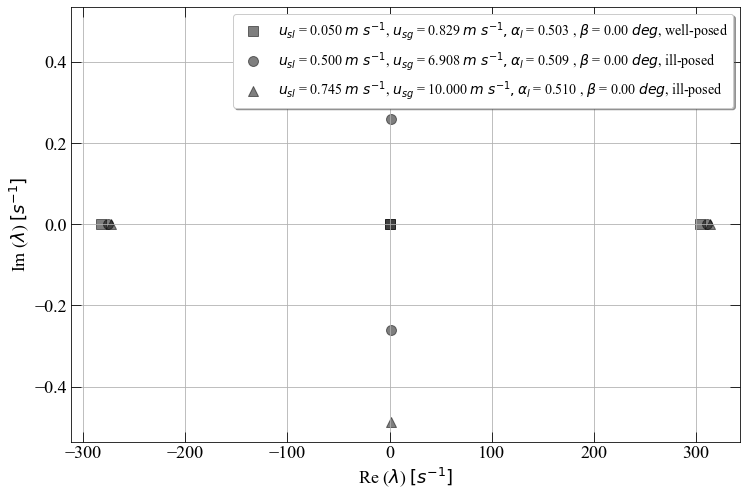

 >>>  =  0.25 deg
>>j_g =  0.829
>j_l =  0.05
alphal= 0.82671023964245
eigenvalues =  [ 299.00027555+0.j -289.48456709+0.j   -0.416915  +0.j    0.58995769+0.j]
>j_l =  0.5
alphal= 0.8795258832148091
eigenvalues =  [ 3.01501097e+02+0.j -2.87845051e+02+0.j  2.96311081e-01+0.j
  9.46911622e-01+0.j]
>j_l =  0.74529647
alphal= 0.8995840930444277
eigenvalues =  [ 303.13453615+0.j         -286.77636159+0.j
    0.90506689+0.30344277j    0.90506689-0.30344277j]
>>j_g =  6.908
>j_l =  0.05
alphal= 0.1638163327349328
eigenvalues =  [ 3.01722985e+02+0.j -2.85203924e+02+0.j  5.90368258e-02+0.j
  5.55028018e-01+0.j]
>j_l =  0.5
alphal= 0.5319510175096168
eigenvalues =  [ 308.36572979+0.j         -278.88404769+0.j
    0.95823413+0.21795492j    0.95823413-0.21795492j]
>j_l =  0.74529647
alphal= 0.6024273845611721
eigenvalues =  [ 311.03735027+0.j         -276.34351104+0.j
    1.26567828+0.47314875j    1.26567828-0.47314875j]
>>j_g =  10.0
>j_l =  0.05
alphal= 0.10325194541206911
eigenvalues =  [ 3.045

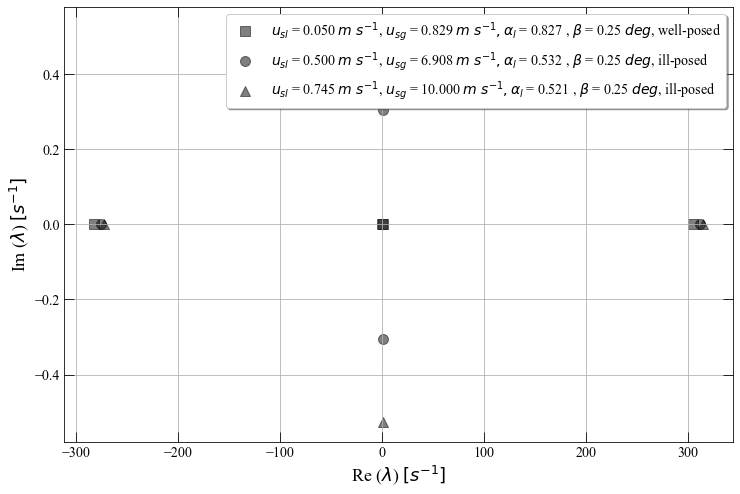

 >>>  =  -5.0 deg
>>j_g =  0.829
>j_l =  0.05
alphal= 0.05522997084811977
eigenvalues =  [ 294.31742526+0.j -292.56249706+0.j    1.09136505+0.j    0.7192423 +0.j]
>j_l =  0.5
alphal= 0.2808401520340347
eigenvalues =  [-292.34351768+0.j  294.64955474+0.j    2.11868633+0.j    1.44148899+0.j]
>j_l =  0.74529647
alphal= 0.37501126124129897
eigenvalues =  [-292.20534395+0.j  294.85911237+0.j    2.36915037+0.j    1.60472415+0.j]
>>j_g =  6.908
>j_l =  0.05
alphal= 0.05262549662450323
eigenvalues =  [ 300.73080008+0.j -286.14815714+0.j    0.77480516+0.j    1.12623342+0.j]
>j_l =  0.5
alphal= 0.2711578603027811
eigenvalues =  [ 302.96826229+0.j -284.01877187+0.j    1.55323409+0.j    2.14125801+0.j]
>j_l =  0.74529647
alphal= 0.3592560798061161
eigenvalues =  [ 304.30131931+0.j -282.75023503+0.j    1.77743352+0.j    2.38302841+0.j]
>>j_g =  10.0
>j_l =  0.05
alphal= 0.049825588790925385
eigenvalues =  [ 303.96276618+0.j -282.91516104+0.j    0.84069913+0.j    1.16746383+0.j]
>j_l =  0.5
alphal= 

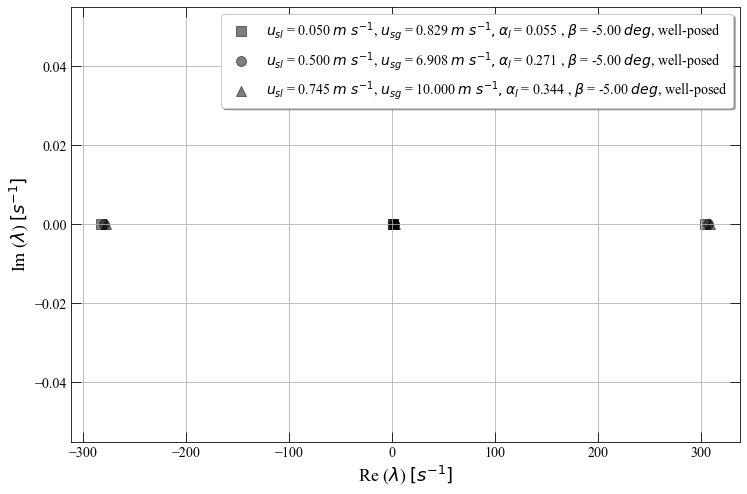

In [7]:
#MAP 
var1mapeig = np.zeros ((testpointsj_l_cases, testpointsj_g_cases))
maprealeig = [[ ] for i in range(testpointsj_l_cases)]
mapimageig = [[ ] for i in range(testpointsj_l_cases)]
mapwpeig   = [[ ] for i in range(testpointsj_l_cases)]
    
k = 0
for beta in betavector:
    print (" >>>  = ", np.rad2deg(beta), "deg")
    j = 0 #for each element of j2vector
    for j_g in j_gcases: #iterative process for j2
        print (">>j_g = ", j_g)
        
        i = 0 #for each element of j1vector
        
        listj_l_imageig = [[] for i in range(6)]
        listj_l_realeig = [[] for i in range(6)]
        
        for j_l in j_lcases: #iterative process for j1
            print (">j_l = ", j_l)
            
            # finding the solution with fsolve
            var4 = var4_0
            var1eq = brenth (equilibrium1, lima, limb)
            print("alphal=", var1eq)
            var1mapeig[i,j] = var1eq
            
            # parameters used in boundary conditions
            var1_0 = var1eq
            var2_0 = var2 (var1eq)
            var3_0 = var3 (var1eq)
            
            Aevaleig = np.asarray (Amat (var1_0, var2_0, var3_0, var4_0))
            Bevaleig = np.asarray (Bmat (var1_0, var2_0, var3_0, var4_0))
            
            meig1, _ = eig (Bevaleig, b = Aevaleig, overwrite_a = True, overwrite_b = True, check_finite = True)
            print("eigenvalues = ", meig1)

            listrealeig1 = []
            listimageig1 = []
            
            for l1eig in range (len (meig1)):
                realparteig1 = meig1 [l1eig].real                
                imagparteig1 = meig1 [l1eig].imag
                
                listimageig1.append (imagparteig1)
                listrealeig1.append (realparteig1)
            
            mapimageig[i] = listimageig1
            maprealeig[i] = listrealeig1

            if all ([ v == 0 for v in listimageig1]) :
                condition = 'well-posed'
            else: 
                condition = 'ill-posed'
            
            mapwpeig[i] = condition
            i += 1      
        j += 1
        
    # Plot eigenspectra
    fig, ax = plt.subplots ()

    for ii in range(testpointsj_l_cases):
        ax.scatter (maprealeig [ii],
                    mapimageig [ii], 
                    s = areatestpoints,
                    marker = listmarkers[ii],
                    color = listcolor [0], 
                    edgecolors = listcolor [0],
                    linewidths = 1,
                    alpha = alphascatter,
                    label = '$u_{sl}$'+ ' = ' + str("%.3f" %j_lcases [ii])+ ' $\it{m \; s^{-1}}$' + ', ' + '$u_{sg}$' + ' = ' + str("%.3f" %j_gcases[ii]) + ' $\it{m \; s^{-1}}$' + '$ , $' + r'$\alpha_l$' + ' = ' + str("%.3f" %var1mapeig [ii, ii]) + ' ' + ', ' + r'$\beta$' + ' = ' + str("%.2f" %betavectordeg [k]) + ' $\it{deg}$' + ', ' + mapwpeig[ii])

        # ax.set_xscale ('symlog')
#         ax.set_yscale ('symlog')
        
        # minor ticks.
#         ax.xaxis.set_major_locator(MultipleLocator(1))
#         ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
        
#         ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        
        # For the minor ticks, use no labels; default NullFormatter.
#         ax.xaxis.set_minor_locator(MultipleLocator(0.2))
#         ax.yaxis.set_minor_locator(MultipleLocator(0.2))
        ax.xaxis.set_minor_locator(MultipleLocator(100))

        plt.rcParams ['figure.figsize'] = [12, 8]
        leg1 = ax.legend (loc = 'best', frameon = True, fontsize = 14, shadow = True);
        plt.grid (True, which = "both")
        
        matplotlib.rc ('xtick', labelsize = 14)     
        matplotlib.rc ('ytick', labelsize = 14)

        # plt.ylim (( - 1  , 1))
        # plt.xlim (( - 1e3, 1e3))
        #tick_params(labeltop=False, labelright=True)
        #plt.savefig('well-posedness_map_hilly-terrain_vkh.jpg')
        
        ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
        ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
        ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
        ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

        ax.set_xlabel(r'Re ($\lambda$) $[\it{s^{-1}}]$', fontsize = 18)
        ax.set_ylabel(r'Im ($\lambda$) $[\it{s^{-1}}]$', fontsize = 18)

#         plt.savefig('figures/well-posedness_map_4_'+ str(k) +'.pdf',
                # optimize = True,
                # transparent = True,  
                # dpi = 1000)
    plt.show ()
    
    k += 1

## End of well-posedness analysis

## Fourier analysis

In [9]:
j_lvector       = np.linspace (minj_l, maxj_l, num = testpointsj_l)
j_gvector       = np.linspace (minj_g, maxj_g, num = testpointsj_g)
j_lmapstability = np.zeros ((testpointsbeta,testpointsj_l)) #(rows,columns)

k = 0
for beta in betavector:
    print ("  >>> β = ", np.rad2deg(beta), "deg")
    j = 0 #for each element of j2vector
    for j_g in j_gvector: #iterative process for j2
        i = 0 #for each element of j1vector
        for j_l in j_lvector: #iterative process for j1
            var4 = var4_0
            var1eq = brenth (equilibrium1, lima, limb)
            
            # parameters used in boundary conditions
            var1_0 = var1eq
            var2_0 = var2 (var1eq)
            var3_0 = var3 (var1eq)
            ref = np.array([var1_0, var2_0, var3_0, var4_0])
            
            Aeval = np.asarray (Amat (var1_0, var2_0, var3_0, var4_0))
            Beval = np.asarray (Bmat (var1_0, var2_0, var3_0, var4_0))
            Ceval = np.asarray (Cmat_lin (var1_0, var2_0, var3_0, var4_0))

            Acomplex   = Aeval.dot (1j)
            Bcomplex   = Beval.dot (1j)
            Ccomplex   = Ceval.dot (1j)
            
            #criterion for well-posedness
            m2, _ = eig ( (-wavenumber_fourier*Bcomplex - Ceval), b =  -Acomplex, overwrite_a = True, overwrite_b = True, check_finite = True) 
            
            listreal2   = []
            listimag2   = []
            
            for l2 in range (len (m2)):
                realpart = m2 [l2].real                
                imagpart = m2 [l2].imag
                
                listimag2.append (imagpart)
                listreal2.append (realpart)
            
            if all ([ v > 0 for v in listimag2]) :
                i += 1
            else: 
                j_lmapstability [k, j] = j_l
                break
        j += 1
    k += 1

  >>> β =  0.0 deg
  >>> β =  0.25 deg
  >>> β =  -5.0 deg


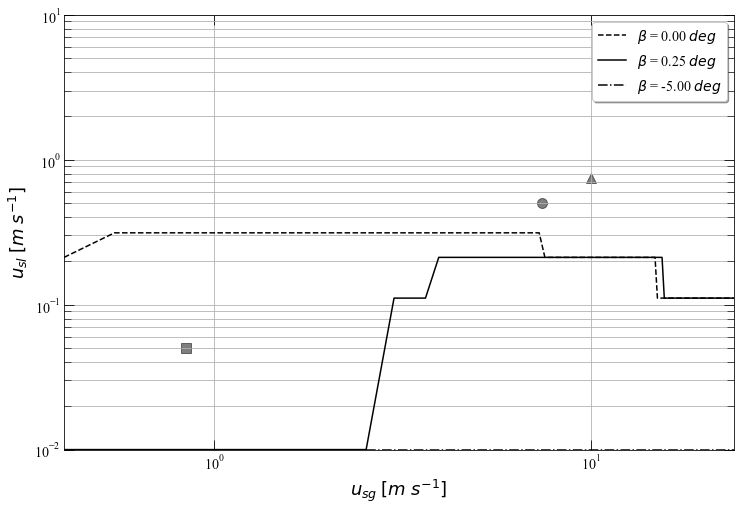

In [10]:
x = j_gvector
fig, ax = plt.subplots ()

for i in range(testpointsbeta):
    ax.loglog (x,
               j_lmapstability [i, :],
               liststyles [i],
               color = 'k' ,
               label = r'$\beta$' + ' = ' + str("%.2f" %betavectordeg [i]) + ' $\it{deg}$')

for i in range (testpointsj_l_cases):
    ax.scatter (j_gcases [i], 
                j_lcases [i],
                s = areatestpoints, 
                color = listcolor [0], 
                marker = listmarkers[i], 
                edgecolors = listcolor [0], 
                linewidths = 1, 
                alpha = alphascatter)
    ax.set_xscale ('symlog')

    #ax.set_xscale ('symlog')
    #ax.set_yscale ('symlog')
    #ax.scatter (mapreal [number], mapimag [number], s = area, marker = listmarkers[number], color='k', alpha = 0.5, label = '$j_1$' + '=' +str("%.2f" %j1vector [number]) + ' m/s')

# Savitzky-Golay Filter
# for i in range (testpointsbeta): #scipy.signal.savgol_filter: window size 51, polynomial order 3  *******63, 1
#     ax.loglog (x, scipy.signal.savgol_filter(j1mapstability [i,:], 93, 1), liststyles [i], color = 'k', label = '$beta$' + ' = '+str("%.2f" %betavectordeg [i]) + ' deg')

#plt.title('Well-posedness limit for horizontal and inclined pipes')

plt.ylim ((minj_l, maxj_l))
plt.xlim ((minj_g, maxj_g))

#tick_params(labeltop=False, labelright=True)
plt.grid (True, which = "both")
plt.rcParams ['figure.figsize'] = [12, 8]
leg = ax.legend (loc = 'best', fontsize = 14, shadow = True);

matplotlib.rc ('xtick', labelsize = 18)     
matplotlib.rc ('ytick', labelsize = 18)

ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

ax.set_xlabel(r'$u_{sg}$ $[\it{m \; s^{-1}}]$',
            fontsize = 18)
ax.set_ylabel(r'$u_{sl}$ $[\it{m \; s^{-1}}]$',
            fontsize = 18)

plt.show ()
# plt.savefig('figures/stability_map_1.pdf',
                # optimize = True,
                # transparent = True,  
                # dpi = 1000)

## STABILITY ANALYSIS FOR A CONSTANT WAVELENGTH:

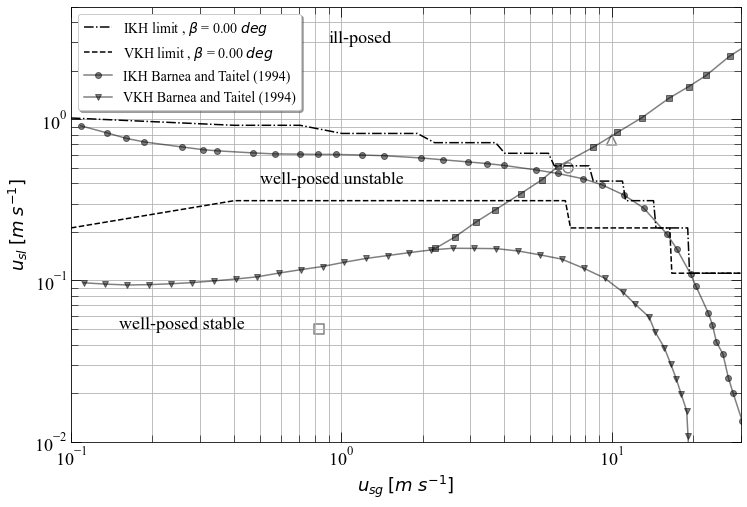

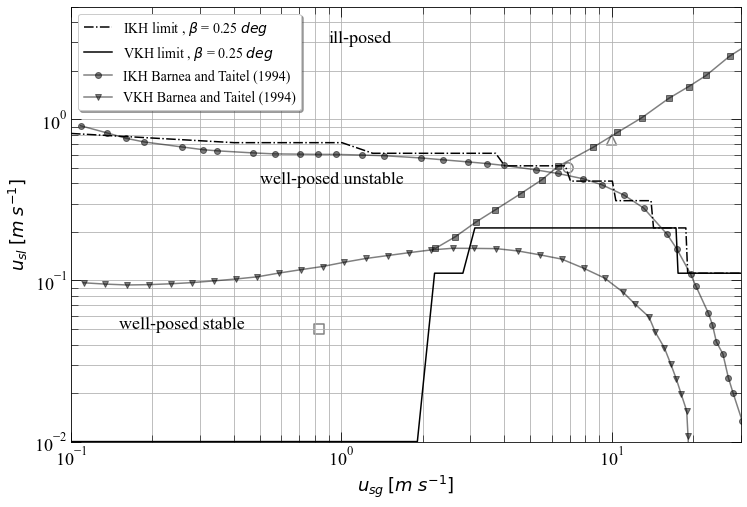

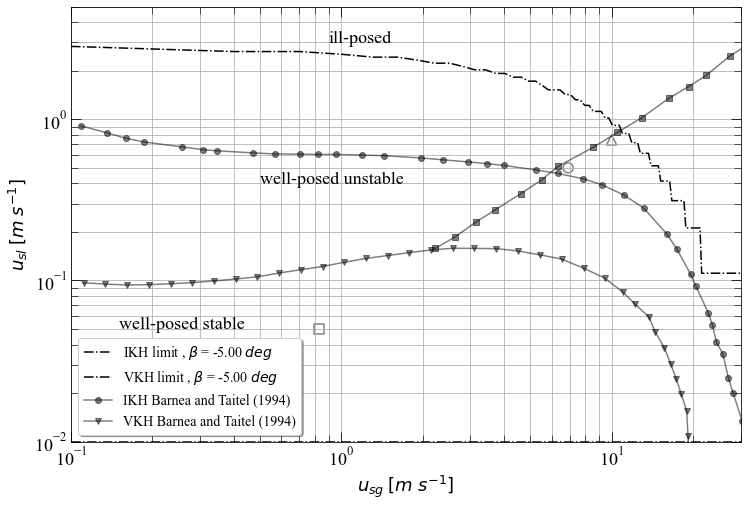

In [11]:
x = j_gvector

i = 0
for i in range(testpointsbeta):
    fig, ax    = plt.subplots ()
    criteria   = ["VKH limit", "IKH limit"]
    
    # neutral stability
    ax.loglog (x,
               j_lmapwellposedness [i, :],
               liststyles [2],
               color = listcolor [0],
               label = criteria [1] + ' , ' + r'$\beta$' + ' = ' + str("%.2f" %betavectordeg [i]) + ' $\it{deg}$')
    ax.loglog (x, j_lmapstability [i, :], liststyles [i], color = 'k', label = criteria [0] + ' , ' + r'$\beta$' + ' = ' + str("%.2f" %betavectordeg [i]) + ' $\it{deg}$')
    
    # Savitzky-Golay Filter ****83, 1
    # ax.loglog (x,
    #            scipy.signal.savgol_filter(j_lmapstability [i,:], 93, 1), #93, 1
    #            liststyles [0], color = listcolor [0],
    #            label = criteria [0] + ' , ' + '$β$' + ' = ' + str("%.2f" %betavectordeg [i]) + ' [°]')
    
    # # line of constant alpha
    # ax.loglog (x,
    #            j_llinemap [i, :],
    #            liststyles [1],
    #            color = listcolor [0],
    #            label =  r'$\alpha_l$ = 0.5 [-]')
  # Fill
    # ax.fill_between(x,
    #                 scipy.signal.savgol_filter(j_lmapstability [i,:], 9, 1),
    #                 j_lmapwellposedness [i, :],
    #                 where = j_lmapwellposedness [i, :] >= scipy.signal.savgol_filter(j_lmapstability [i,:], 113, 1),
    #                 facecolor = 'silver',
    #                 interpolate = True)    
    #ax.scatter (mapreal [number], mapimag [number], s = area, marker = listmarkers[number], color='k', alpha = 0.5, label = '$j_1$' + '=' +str("%.2f" %j1vector [number]) + ' m/s') 
    
    #Scatter
#     ax.plot(j_gtest2 [i, :], j_ltest2 [i, :], 's', color = 'black')

    for i in range (testpointsj_l_cases):
        ax.scatter (j_gcases [i], j_lcases [i], s = areatestpoints, color = listcolor [4], marker = listmarkers[i], edgecolors = listcolor [0], linewidths = 1.5, alpha = 0.5)
        ax.set_xscale ('symlog')

    plt.ylim ((minj_l, maxj_l))
    plt.xlim ((minj_g, maxj_g))

    #plt.title('Well-posedness limit for horizontal and inclined pipes')
    #tick_params(labeltop=False, labelright=True)
    plt.grid (True, which = "both")
    plt.rcParams ['figure.figsize'] = [12, 8]
    leg = ax.legend (loc = 'upper right', frameon = True, fontsize = 14, shadow = True);

    matplotlib.rc ('xtick', labelsize = 18)     
    matplotlib.rc ('ytick', labelsize = 18)

    ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

    ax.set_xlabel(r'$u_{sg}$ $[\it{m \; s^{-1}}]$',
            fontsize = 18)
    ax.set_ylabel(r'$u_{sl}$ $[\it{m \; s^{-1}}]$',
            fontsize = 18)

    #>>>>>>>>>>VALIDATION (JUST ACTIVATE WHEN PLOTING VALIDATION FOR HORIZONTAL)
    minj1            = 1e-2 # epstest
    maxj1            = 5

    minj2            = 1e-1 # epstest
    maxj2            = 30

    # >>HORIZONTAL SANDERSE (D=0.078m)
    # x1,y1 = np.loadtxt('Sanderse2017_horizontal/well-posedness_sanderse.csv',
    #              unpack = True, 
    #              delimiter = ',')
    # x2,y2 = np.loadtxt('Sanderse2017_horizontal/globalstability_sanderse.csv',
    #                 unpack = True, 
    #                 delimiter = ',')
    # # fig, ax = plt.subplots()

    # ax.loglog(x1,y1, 'k-', label = 'IKH Sanderse, Smith and Hendrix (2017)')
    # ax.loglog(x2,y2, 'k:', label = 'VKH Sanderse, Smith and Hendrix (2017)')

    # plt.ylim ((minj1, maxj1))
    # plt.xlim ((minj2, maxj2))
    # plt.grid (True, which = "both")
    # leg = ax.legend (loc = 'upper right',
    #                 fontsize = 14);
    # plt.rcParams ['figure.figsize'] = [12, 8]

    # matplotlib.rc ('xtick',
    #             labelsize = 18)     
    # matplotlib.rc ('ytick',
    #             labelsize = 18)
    # leg1  = ax.legend (loc = 'upper right',
    #                 shadow = True, 
    #                 frameon = True, 
    #                 fontsize = 14);

    # ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
    # ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
    # ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
    # ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

    # ax.set_xlabel(r'$u_{sg}$ [m/s]',
    #             fontsize = 18)
    # ax.set_ylabel(r'$u_{sl}$ [m/s]',
    #             fontsize = 18)

    #================================
    # >># Plot Barnea Shoham Taitel (1981) for validation 
    # https://automeris.io/WebPlotDigitizer/tutorial.html
    # horizontal pipe d = 0.051

    x1,y1 = np.loadtxt('validation/barnea1994_ikh-vkhlimits/barnea1994horizontal/barnea1994_0deg_IKH.csv',
                    unpack = True, 
                    delimiter = ',')
    x2,y2 = np.loadtxt('validation/barnea1994_ikh-vkhlimits/barnea1994horizontal/barnea1994_0deg_VKH.csv',
                    unpack = True, 
                    delimiter = ',')
    x3,y3 = np.loadtxt('validation/barnea1994_ikh-vkhlimits/barnea1994horizontal/shoham1982_0deg.csv',
                    unpack = True, 
                    delimiter = ',')
    x4,y4 = np.loadtxt('validation/barnea1994_ikh-vkhlimits/barnea1994horizontal/barnea1994_0deg_hlD.csv',
                    unpack = True, 
                    delimiter = ',')

    # fig, ax = plt.subplots(1)

    area = area_scatter
    ax.loglog(x1,y1, 'ko-', alpha = alphascatter, label = 'IKH Barnea and Taitel (1994)')
    ax.loglog(x2,y2, 'kv-', alpha = alphascatter, label = 'VKH Barnea and Taitel (1994)')
    # ax.scatter(x2,y2, s = area, marker = "v", color='k', alpha = alphaplot, edgecolors = 'k', linewidths = 1, label = 'VKH Barnea and Taitel (1994)')
    # ax.loglog(x3,y3, 'k^-', alpha = alphaplot, label = 'VKH Shoham (1982)')
    ax.loglog(x4,y4, 'ks-', alpha = alphascatter, label = r'$\alpha_l$ = 0.5')

    plt.ylim ((minj1, maxj1))
    plt.xlim ((minj2, maxj2))
    plt.grid (True, which = "both")
    leg = ax.legend (loc = 'best',
                    fontsize = 14);
    plt.rcParams ['figure.figsize'] = [12, 8]

    matplotlib.rc ('xtick',
                labelsize = 18)     
    matplotlib.rc ('ytick',
                labelsize = 18)

    handles,labels = ax.get_legend_handles_labels()

    handles = [handles[0], handles[1], handles[2], handles[3]]
    labels = [labels[0], labels[1], labels[2], labels[3]]

    leg1  = ax.legend (handles,
                    labels,
                    loc = 'best',
                    shadow = True, 
                    frameon = True, 
                    fontsize = 14);

    ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

    ax.set_xlabel(r'$u_{sg}$ $[\it{m \; s^{-1}}]$', 
                fontsize = 18, 
                fontdict = font)
    ax.set_ylabel(r'$u_{sl}$ $[\it{m \; s^{-1}}]$',
                fontdict = font,
                fontsize = 18)

    plt.text(0.15, 0.05, 'well-posed stable', size = 18)
    plt.text(0.5, 0.4, 'well-posed unstable', size = 18)
    plt.text(0.9, 3, 'ill-posed', size = 18)


    # =================
    # 0.25inc

    # x1,y1 = np.loadtxt('barnea1994_ikh-vkhlimits/barnea 1994_025/barnea1994_025deg_IKH.csv',
    #                 unpack = True, 
    #                 delimiter = ',')
    # x2,y2 = np.loadtxt('barnea1994_ikh-vkhlimits/barnea 1994_025/barnea1994_025deg_VKH.csv',
    #                 unpack = True, 
    #                 delimiter = ',')
    # x3,y3 = np.loadtxt('barnea1994_ikh-vkhlimits/barnea 1994_025/shoham1982_025deg.csv',
    #                 unpack = True, 
    #                 delimiter = ',')
    # x4,y4 = np.loadtxt('barnea1994_ikh-vkhlimits/barnea 1994_025/barnea1994_025deg_hlD.csv',
    #                 unpack = True, 
    #                 delimiter = ',')

    # # fig, ax = plt.subplots(1)

    # area = 25
    # alphaplot = 0.6
    # ax.loglog(x1,y1, 'ko-', alpha = alphaplot, label = 'IKH Barnea and Taitel (1994)')
    # ax.loglog(x2,y2, 'kv-', alpha = alphaplot, label = 'VKH Barnea and Taitel (1994)')
    # # ax.scatter(x2,y2, s = area, marker = "v", color='k', alpha = alphaplot, edgecolors = 'k', linewidths = 1, label = 'VKH Barnea and Taitel (1994)')
    # # ax.loglog(x3,y3, 'k^-', alpha = alphaplot, label = 'VKH Shoham (1982)')
    # # ax.loglog(x4,y4, 'ks-', alpha = alphaplot, label = r'$\alpha_l$ = 0.5')

    # plt.ylim ((minj1, maxj1))
    # plt.xlim ((minj2, maxj2))
    # plt.grid (True, which = "both")
    # leg = ax.legend (loc = 'best',
    #                 fontsize = 14);
    # plt.rcParams ['figure.figsize'] = [12, 8]

    # matplotlib.rc ('xtick',
    #             labelsize = 18)     
    # matplotlib.rc ('ytick',
    #             labelsize = 18)

    # handles,labels = ax.get_legend_handles_labels()

    # handles = [handles[0], handles[1], handles[2], handles[3]]
    # labels = [labels[0], labels[1], labels[2], labels[3]]

    # leg1  = ax.legend (handles,
    #                 labels,
    #                 loc = 'best',
    #                 shadow = True, 
    #                 frameon = True, 
    #                 fontsize = 14);

    # ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
    # ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
    # ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
    # ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

    # ax.set_xlabel(r'$u_{sg}$ [m/s]', 
    #             fontsize = 18, 
    #             fontdict = font)
    # ax.set_ylabel(r'$u_{sl}$ [m/s]',
    #             fontdict = font,
    #             fontsize = 18)

    # plt.text(0.3, 0.05, 'well-posed stable', size = 18)
    # plt.text(5.0, 0.02, 'well-posed unstable', size = 18)
    # plt.text(1.1, 2, 'ill-posed', size = 18)

    # =================
    # -5inc

    # x1,y1 = np.loadtxt('barnea1994_ikh-vkhlimits/barnea1994-5/barnea1994_-5deg_IKH.csv',
    #                 unpack = True, 
    #                 delimiter = ',')
    # # x2,y2 = np.loadtxt('barnea1994_ikh-vkhlimits/barnea1994horizontal/barnea1994_0deg_VKH.csv',
    # #                  unpack = True, 
    # #                  delimiter = ',')
    # x2,y2 = np.loadtxt('barnea1994_ikh-vkhlimits/barnea1994-5/shoham1982_-5deg.csv',
    #                 unpack = True, 
    #                 delimiter = ',')
    # x3,y3 = np.loadtxt('barnea1994_ikh-vkhlimits/barnea1994-5/barnea1994_-5deg_hlD.csv',
    #                 unpack = True, 
    #                 delimiter = ',')

    # # fig, ax = plt.subplots(1)

    # area = 25
    # alphaplot = 0.6
    # ax.loglog(x1,y1, 'ko-', alpha = alphaplot, label = 'IKH Barnea and Taitel (1994)')
    # # ax.loglog(x2,y2, 'kv-', alpha = alphaplot, label = 'VKH Barnea and Taitel (1994)')
    # # ax.scatter(x2,y2, s = area, marker = "v", color='k', alpha = alphaplot, edgecolors = 'k', linewidths = 1, label = 'VKH Barnea and Taitel (1994)')
    # ax.loglog(x2,y2, 'k^-', alpha = alphaplot, label = 'VKH Shoham (1982)')
    # ax.loglog(x3,y3, 'ks-', alpha = alphaplot, label = r'$\alpha_l$ = 0.5')

    # plt.ylim ((minj1, maxj1))
    # plt.xlim ((minj2, maxj2))
    # plt.grid (True, which = "both")
    # leg = ax.legend (loc = 'best',
    #                 fontsize = 14);
    # plt.rcParams ['figure.figsize'] = [12, 8]

    # matplotlib.rc ('xtick',
    #             labelsize = 18)     
    # matplotlib.rc ('ytick',
    #             labelsize = 18)

    # handles,labels = ax.get_legend_handles_labels()

    # handles = [handles[0], handles[1], handles[2]]
    # labels = [labels[0], labels[1], labels[2]]

    # leg1  = ax.legend (handles,
    #                 labels,
    #                 loc = 'best',
    #                 shadow = True, 
    #                 frameon = True, 
    #                 fontsize = 14);

    # ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
    # ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
    # ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
    # ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

    # ax.set_xlabel(r'$u_{sg}$ [m/s]', 
    #             fontsize = 18, 
    #             fontdict = font)
    # ax.set_ylabel(r'$u_{sl}$ [m/s]',
    #             fontdict = font,
    #             fontsize = 18)

    # plt.text(3.0, 0.012, 'well-posed stable', size = 18)
    # plt.text(0.3, 0.5, 'well-posed unstable', size = 18)
    # plt.text(1.5, 3, 'ill-posed', size = 18)





#     plt.show ()
#     plt.savefig('figures/stability_map_2_'+ str(i) +'.pdf',
                # optimize = True,
                # transparent = True,  
                # dpi = 1000)

    i += 1

## EIGENSPECTRA FOR STRATIFIED SMOOTH AND ILL-POSED REGION

 >>>  =  0.0 deg
>>j_g =  0.829
>j_l =  0.05
var1eq =  0.503221382217498
imaginary angular frequencies [ 1.29760710e+01  1.18169225e+01 -9.86892501e-04  2.18221742e-01]
real angular frequencies [ 1855.19097463 -1834.24402967    -2.10524363     3.37703954]
VKH unstable
unstable mode [-0.00098689]
imaginary part [[[-0.00098689  0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]]
real part [[[-2.10524363  0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[ 0.          0.          0.        ]
  [ 0.          0.          

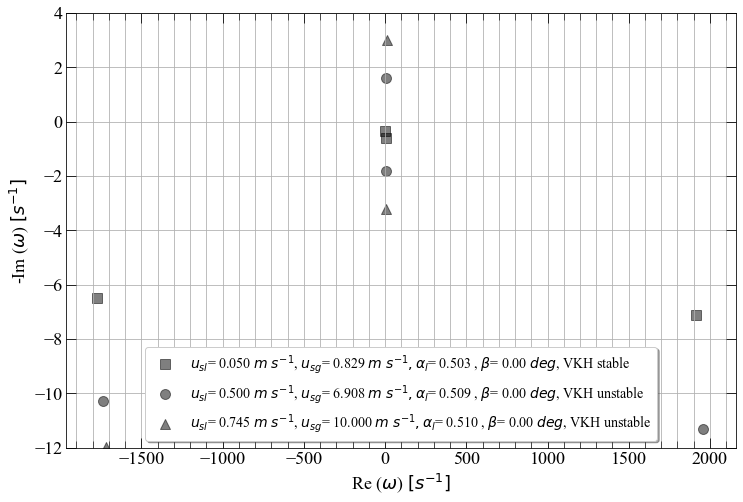

 >>>  =  0.25 deg
>>j_g =  0.829
>j_l =  0.05
var1eq =  0.82671023964245
imaginary angular frequencies [37.05088945 33.7159499   1.67393208 -1.13276334]
real angular frequencies [ 1878.32775393 -1818.53910444    -2.90431853     3.99188796]
VKH unstable
unstable mode [-1.13276334]
imaginary part [[[-9.86892501e-04 -1.89398384e+00 -3.74777646e+00]
  [ 0.00000000e+00 -1.04276067e+00 -2.61855669e+00]
  [ 0.00000000e+00 -1.59866706e+00 -3.00781582e+00]]

 [[-1.13276334e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]]
real part [[[-2.10524363  7.6237262  10.19976596]
  [ 0.          7.20091636  8.97129582]
  [ 0.          7.92045775  9.90461124]]

 [[ 3.99188796  0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.

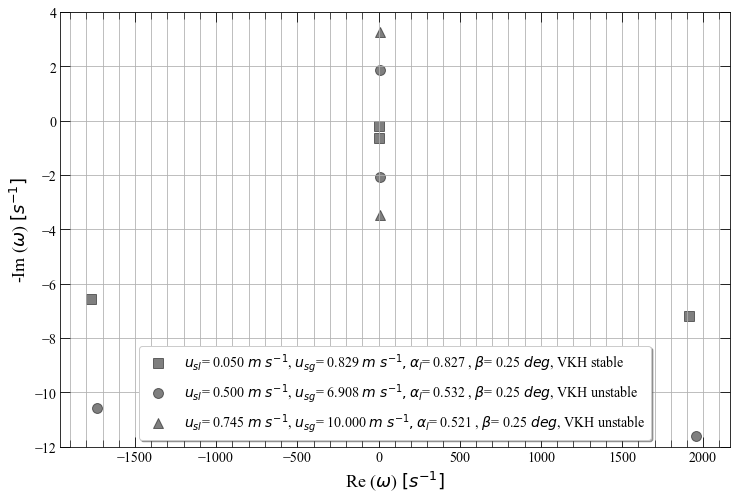

 >>>  =  -5.0 deg
>>j_g =  0.829
>j_l =  0.05
var1eq =  0.05522997084811977
imaginary angular frequencies [ 6.82881847  6.22226735 -0.63196472  2.21495878]
real angular frequencies [ 1849.2392997  -1838.21277044     7.35147934     4.02491201]
VKH unstable
unstable mode [-0.63196472]
imaginary part [[[-9.86892501e-04 -1.89398384e+00 -3.74777646e+00]
  [ 0.00000000e+00 -1.04276067e+00 -2.61855669e+00]
  [ 0.00000000e+00 -1.59866706e+00 -3.00781582e+00]]

 [[-1.13276334e+00 -3.23234892e+00 -4.78360490e+00]
  [ 0.00000000e+00 -1.46911478e+00 -2.97729849e+00]
  [ 0.00000000e+00 -1.85823914e+00 -3.24646260e+00]]

 [[-6.31964723e-01  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]]
real part [[[-2.10524363  7.6237262  10.19976596]
  [ 0.          7.20091636  8.97129582]
  [ 0.          7.92045775  9.90461124]]

 [[ 3.99188796  8.13506475 10.78997726]
  [ 0.          6.79428918  8.7759162 ]
  [ 0.         

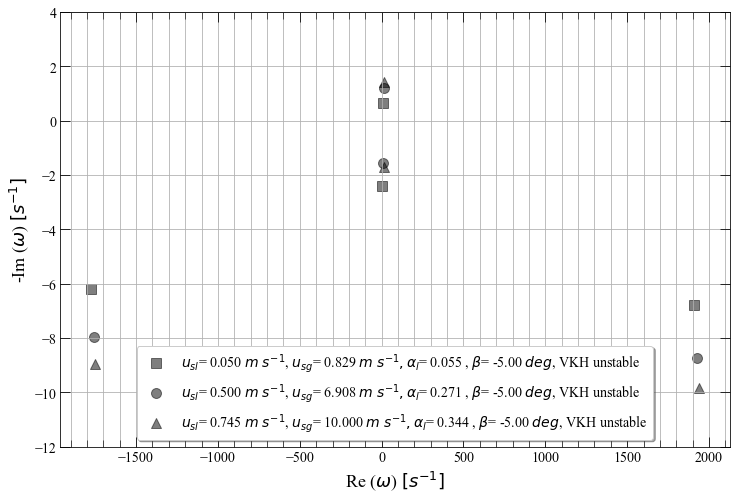

In [12]:
var2mapeig = np.zeros ((testpointsj_l_cases, testpointsj_g_cases))
map2realeig = [[ ] for i in range(testpointsj_l_cases)]
map2imageig = [[ ] for i in range(testpointsj_l_cases)]

map2wpeig   = [[ ] for i in range(testpointsj_l_cases)]
# map3wpeig   = [[ ] for i in range(testpointsj_l_cases)]

ang_freq_imag = np.zeros ((testpointsbeta,testpointsj_l_cases, testpointsj_g_cases))
ang_freq_real = np.zeros ((testpointsbeta,testpointsj_l_cases, testpointsj_g_cases))

eig_vect = ThreeD(testpointsbeta,testpointsj_l_cases, testpointsj_g_cases)

k = 0
for beta in betavector:
    print (" >>>  = ", np.rad2deg(beta), "deg")
    j = 0 #for each element of j2vector
    for j_g in j_gcases: #iterative process for j2
        print (">>j_g = ", j_g)
        i = 0 #for each element of j1vector
        
        # listj_l_imageig = [[] for i in range(6)] ######nao usado
        # listj_l_realeig = [[] for i in range(6)] ######nao usado
        
        for j_l in j_lcases: #iterative process for j1
            print (">j_l = ", j_l)
            
            # finding the solution with fsolve
            var4 = var4_0
            var1eq = brenth (equilibrium1, lima, limb)
            print("var1eq = ", var1eq)
            var2mapeig [i,j] = var1eq
            
            # parameters used in boundary conditions
            var1_0 = var1eq
            var2_0 = var2 (var1eq)
            var3_0 = var3 (var1eq)
            
            Aeval = np.asarray (Amat (var1_0, var2_0, var3_0, var4_0))
            Beval = np.asarray (Bmat (var1_0, var2_0, var3_0, var4_0))
            Ceval = np.asarray (Cmat_lin (var1_0, var2_0, var3_0, var4_0))
            
            Acomplex   = Aeval.dot (1j)
            Bcomplex   = Beval.dot (1j)

            # wavenumber = wavenumber_fourier
            meig2, v2eig = eig ( (-wavenumber_fourier*Bcomplex - Ceval), b =  -Acomplex, overwrite_a = True, overwrite_b = True, check_finite = True) 

            listrealeig2 = []
            listimageig2 = []
            
            printeigenvectors = []

            for l in range (len (meig2)):
                realpart = meig2 [l].real                
                imagpart = meig2 [l].imag
                
                listimageig2.append (imagpart)
                listrealeig2.append (realpart)
            
            map2imageig[i] = np.array(listimageig2)
            map2realeig[i] = np.array(listrealeig2)

            if all ([ v > 0 for v in listimageig2]) :
                condition = 'VKH stable'
            else:
                # var2mapeig [k, j] = j_l
                condition = 'VKH unstable'

            map2wpeig[i] = condition

            print("imaginary angular frequencies", map2imageig[i])
            print("real angular frequencies", map2realeig[i])

            local1 = np.where(map2imageig[i] < 0)
            
            if any ([ vv < 0 for vv in map2imageig[i]]) :
                print("VKH unstable")
                print("unstable mode", map2imageig[i][local1])
                ang_freq_imag [k, j, i] = map2imageig[i][local1]
                print("imaginary part", ang_freq_imag)
                ang_freq_real [k, j, i] = map2realeig[i][local1]
                print("real part", ang_freq_real)
                print("eigenvectors", v2eig[local1][0])
                eig_vect [k][j][i] = v2eig[local1][0]
            else: 
                print("VKH stable")
                print("unstable mode", 0)
                ang_freq_imag [k, j, i] = 0
                print(ang_freq_imag)
                print("eigenvectors", 0)
                eig_vect [k][j][i] = 0
        
            i += 1      
        j += 1

        
    # Plot eigenspectra
    fig, ax = plt.subplots ()

    print("var2mapeig =", var2mapeig)
    for jj in range(testpointsj_l_cases):
        ax.scatter (map2realeig [jj],
                    -map2imageig [jj], 
                    s = areatestpoints,
                    marker = listmarkers[jj],
                    color = listcolor [0], 
                    edgecolors = listcolor [0],
                    linewidths = 1,
                    alpha = alphascatter,
                    label = '$u_{sl}$'+ '= ' + str("%.3f" %j_lcases [jj])+ ' $\it{m \; s^{-1}}$' + ', ' + '$u_{sg}$' + '= ' + str("%.3f" %j_gcases[jj]) + ' $\it{m \; s^{-1}}$' + '$ , $' + r'$\alpha_l$' + '= ' + str("%.3f" %var2mapeig [jj, jj]) + ' ' + ', ' + r'$\beta$' + '= ' + str("%.2f" %betavectordeg [k]) + ' $\it{deg}$' + ', ' + map2wpeig[jj])

        # ax.set_xscale ('symlog')
        ax.xaxis.set_minor_locator(MultipleLocator(100))

        plt.rcParams ['figure.figsize'] = [12, 8]
        leg1 = ax.legend (loc = 'lower', frameon = True, fontsize = 14, shadow = True);
        plt.grid (True, which = "both")
        
        matplotlib.rc ('xtick', labelsize = 14)     
        matplotlib.rc ('ytick', labelsize = 14)

        plt.ylim ( -12, 4)
        # plt.xlim (( -1e3, 1e3))
        
        ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
        ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
        ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
        ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

        ax.set_xlabel(r'Re ($\omega$) $[\it{s^{-1}}]$', fontsize = 18)
        ax.set_ylabel(r'-Im ($\omega$) $[\it{s^{-1}}]$', fontsize = 18)

#         plt.savefig('figures/well-posedness_map_4_'+ str(k) +'.pdf',
                # optimize = True,
                # transparent = True,  
                # dpi = 1000)
    plt.show ()
    
    k += 1

### End of Fourier analysis. 

## Dispersion analysis

  >>>> β =  0.0 deg


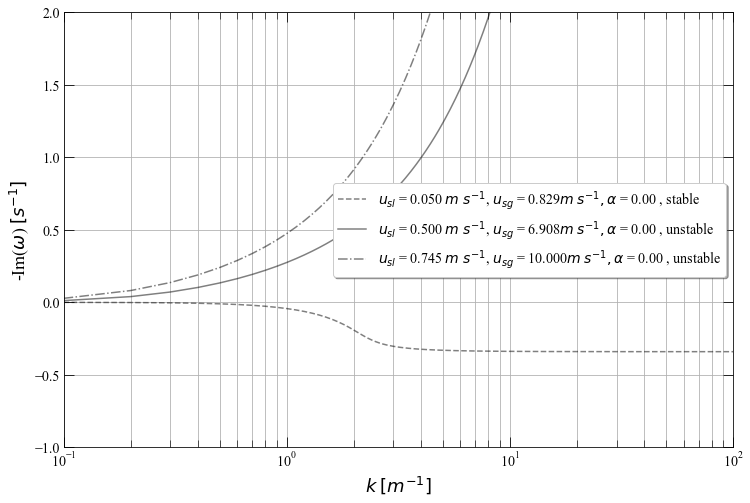

  >>>> β =  0.25 deg


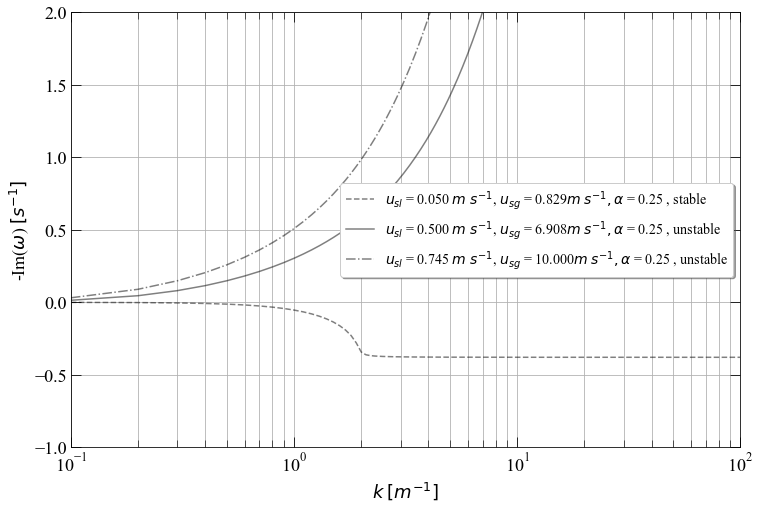

  >>>> β =  -5.0 deg


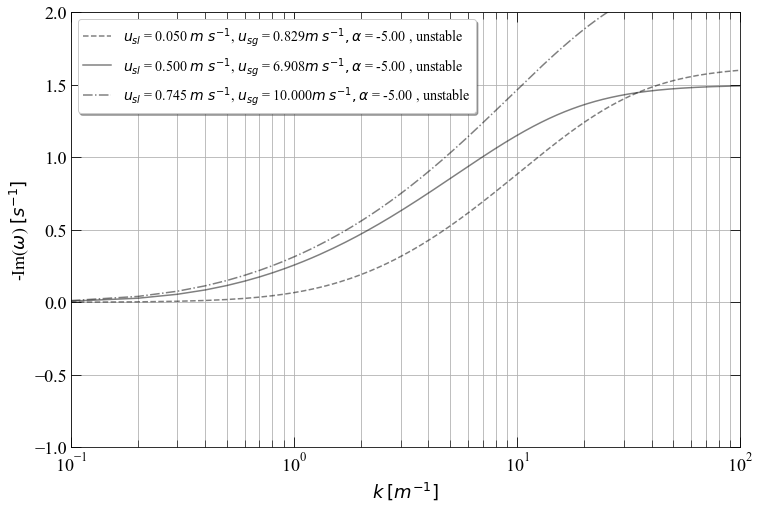

In [14]:
lambdavector = np.linspace (minlambda, maxlambda, num = testpointsdispersion)
wavenumbervector = np.linspace (1e-1, 1e2, num = testpointsdispersion)

j_lmapstability = np.zeros ((testpointsbeta,testpointsj_l_cases)) #(rows,columns)

#print("first j1map=", j1map)
k = 0
for beta in betavector:
    print ("  >>>> β = ", np.rad2deg(beta), "deg")
    imagmap = np.zeros ((testpointsj_l_cases, testpointsdispersion)) #(rows,columns)
    mapwp   = [[ ] for i in range (testpointsj_l_cases)]
    
    j = 0 #for each element of j2vector
    for j_g in j_gcases: #iterative process for j2        
        i = 0 #for each element of j1vector
        for j_l in j_lcases: #iterative process for j1
            var4 = var4_0
            var1eq = brenth (equilibrium1, lima, limb)
            
            # parameters used in boundary conditions
            var1_0 = var1eq
            var2_0 = var2 (var1eq)
            var3_0 = var3 (var1eq)
            ref = np.array([var1_0, var2_0, var3_0, var4_0])
            
            # phi=[alpha2, u2, u1, p]ˆT
            Aeval = np.asarray (Amat (var1_0, var2_0, var3_0, var4_0))
            Beval = np.asarray (Bmat (var1_0, var2_0, var3_0, var4_0))
            Ceval = np.asarray (Cmat_lin (var1_0, var2_0, var3_0, var4_0))

            Acomplex = Aeval.dot (1j)
            Bcomplex = Beval.dot (1j)
                        
            #criterion for well-posedness
            h = 0
            for wavenumber in wavenumbervector:
                # wavelength = 2*pi/wavenumber
                m, _ = eig ( (-wavenumber*Bcomplex - Ceval), b =  -Acomplex, overwrite_a = True, overwrite_b = True, check_finite = True) 

                listreal   = []
                listimag   = [] 

                for l in range (len (m)):
                    #print("l =", l)
                    realpart = m [l].real                
                    imagpart = m [l].imag

                    listimag.append (imagpart)
                    listreal.append (realpart)

                if any ([ v < 0 for v in listimag]) :
                    condition      = 'unstable'
                    imagmap [i, h] = min ((np.asarray (listimag)))
                    mapwp[i]       = condition
                else: 
                    condition      = 'stable'
                    imagmap [i, h] = min ( (np.asarray (listimag)))
                    mapwp[i]       = condition
                h +=1
            i += 1 
        j += 1

    # Plot of eigenspectra
    fig, ax = plt.subplots ()
    for jj in range(testpointsj_l_cases):
        ax.plot (wavenumbervector,
                 -imagmap [jj],
                 liststyles [jj],
                 color = listcolor [0],
                 alpha = alphascatter,
                 label = '$u_{sl}$' + ' = ' + str("%.3f" %j_lcases [jj]) + ' $\it{m \; s^{-1}}$' + ', ' + '$u_{sg}$' + ' = ' + str("%.3f" %j_gcases[jj]) + '$\it{m \; s^{-1}}$' + '$ , $' + r'$\alpha$' + ' = ' + str("%.2f" %betavectordeg [k]) + '' + ' , ' + mapwp[jj])
        ax.set_xscale ('log')
        
        plt.rcParams ['figure.figsize'] = [12, 8]
        leg1 = ax.legend (loc = 'best', frameon = True, fontsize = 14, shadow = True);
        plt.grid (True, which = "both")
        plt.ylim (-1, 2)
        plt.xlim (1e-1, 100)
        matplotlib.rc ('xtick', labelsize = 18)     
        matplotlib.rc ('ytick', labelsize = 18)
        
        ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
        ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
        ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
        ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')
        
        ax.set_xlabel('$\it{k}$ $[\it{m^{-1}}]$',
            fontsize = 18)
        ax.set_ylabel(r'-Im($\omega$) $[\it{s^{-1}}]$',
            fontsize = 18)

        # plt.savefig('figures/fourier_1_'+ str(k) +'.pdf',
                # optimize = True,
                # transparent = True,  
                # dpi = 1000)
    
    plt.axvline(D, 
                inf_omega, 
                sup_omega, 
                label='pyplot vertical line', 
                color = listcolor [0])
    plt.show ()
    
    k += 1

# Regularization

In [15]:
# lambdavector   = np.linspace (minlambda, maxlambda, num = testpointslambda)

# #MAP MATRICES----------------------------------------------------------------------------------------------------
# j_lmapstability = np.zeros ((testpointsbeta, testpointsj_l_cases)) #(rows,columns)

# #print("first j1map=", j1map)

# k = 0
# for beta in betavector:
#     print ("  >>>> β = ", np.rad2deg(beta), "deg")

#     imagmap = np.zeros ((testpointsj_l_cases,testpointslambda)) #(rows,columns)
#     mapwp   = [[ ] for i in range(testpointsj_l_cases)]
    
#     j = 0 #for each element of j2vector
#     for j_g in j_gcases: #iterative process for j2
#         #print (">>>j2 = ", j2)
        
#         i = 0 #for each element of j1vector
#         for j_l in j_lcases: #iterative process for j1
#             var4 = var4_0
#             var1eq = brenth (equilibrium1, lima, limb)

#             # parameters used in boundary conditions
#             var1_0 = var1eq
#             var2_0 = var2 (var1eq)
#             var3_0 = var3 (var1eq)
#             ref = np.array([var1_0, var2_0, var3_0, var4_0])
            
#             # phi=[alpha2, u2, u1, p]ˆT
#             Aeval    = np.asarray (Amat (var1_0, var2_0, var3_0, var4_0))
#             Beval    = np.asarray (Bmat (var1_0, var2_0, var3_0, var4_0))            
#             Ceval = np.asarray (Cmat_lin (var1_0, var2_0, var3_0, var4_0))

#             Deval    = np.asarray (Dmat (var1_0, var4_0, Gamma_lvector [k,i], Gamma_gvector [k,i],  nu_lvector [k,i], nu_gvector [k,i]))
#             Deval    = Deval.astype (float)
            
#             #print("Deval=",Deval)
#             Acomplex = Aeval.dot (1j)
#             Bcomplex = Beval.dot (1j)
#             Ccomplex = Ceval.dot (1j)
#             Dcomplex = Deval.dot (1j)

#             #criterion for well-posedness
#             h = 0
#             for wavelength in lambdavector:
#                 #print("> wavelength = ", wavelength)
#                 wavenumber = 2*pi/wavelength

#                 m, _ = eig ( (-wavenumber*Bcomplex - Ceval - pow (wavenumber, 2)*Dcomplex), b =  -Acomplex, overwrite_a = True, overwrite_b = True, check_finite = True) 

#                 listreal = []
#                 listimag = []

#                 for l in range (len (m)):
#                     #print("l =", l)
#                     realpart = m [l].real                
#                     imagpart = m [l].imag

#                     listimag.append (imagpart)
#                     listreal.append (realpart)

#                 max_eigval = max (listimag)
#                 min_eigval = min (listimag)

#                 if any ([ v < 0 for v in listimag]) :
#                     condition      = 'unstable'
#                     imagmap [i, h] = max_eigval
#                     mapwp[i]       = condition
#                 else: 
#                     condition      = 'stable'
#                     imagmap [i, h] = min_eigval
#                     mapwp[i]       = condition 
#                 h +=1
#             i += 1 
#         j += 1

#     # Plot of eigenspectra
#     fig, ax = plt.subplots ()
        
#     for ll in range(testpointsj_l_cases):
#         ax.plot (lambdavector/D,
#                  imagmap [ll],
#                  liststyles [ll],
#                  color = listcolor [0],
#                  alpha = 1, label = '$u_{sl}$' + '= ' + str("%.3f" %j_lcases [ll]) + ' $\it{m \; s^{-1}}$' + ' , ' + '$u_{sg}$' + '= ' + str("%.3f" %j_gcases[ll]) + '$\it{m \; s^{-1}}$' + '$ , $' + r'$\beta$' + '= ' + str("%.2f" %betavectordeg [k]) + ' deg')
#         ax.set_xscale ('symlog',
#                        linthreshx = limitlog)
#         ax.set_yscale ('symlog')

#         # minor ticks
# #         ax.xaxis.set_major_locator(MultipleLocator(1))
# #         ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
# #         ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
        
#         # For the minor ticks, use no labels; default NullFormatter.
#         ax.xaxis.set_minor_locator(MultipleLocator(steplambda))

#         plt.rcParams ['figure.figsize'] = [12, 8]
#         leg1 = ax.legend (loc = 'best', frameon = True, fontsize = 14, shadow = True);
#         plt.grid (True, which = "both")
#         # ax.set_xlabel ('$\lambda/D [-]$', fontsize = 18)
#         # ax.set_ylabel ('Im $[\omega] [1/s]$', fontsize = 18)
#         plt.ylim (( inf_omega, sup_omega))
#         plt.xlim ((inf_lambda, sup_lambda))
        
#         ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
#         ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
#         ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
#         ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

#         ax.set_xlabel(r'$\lambda$/D',
#             fontsize = 18)
#         ax.set_ylabel(r'-Im[$\omega$] $[\it{s^{-1}}]$',
#             fontsize = 18)
        
#         # plt.savefig('figures/fourier_2_'+ str(k) +'.pdf',
                # optimize = True,
                # transparent = True,  
                # dpi = 1000)
    
#     plt.axvline(D, 
#                 inf_omega, 
#                 sup_omega, 
#                 color = listcolor [0])
#     plt.show ()
    
#     k += 1

## End Fourier analysis